<a href="https://colab.research.google.com/github/ankitdv98/Car-Brand-Prediction-Deep-Learning-/blob/main/Car_brand_prediction_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [2]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [5]:
!unzip '/content/Datasets1.zip'

Archive:  /content/Datasets1.zip
   creating: Datasets/
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
  inflating: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.j

In [6]:
image_size= [224,224]
train_path= '/content/Datasets/Train'
test_path= '/content/Datasets/Test'

In [5]:
# initialising resnet50
resnet= ResNet50(input_shape= image_size + [3], weights= 'imagenet', include_top= False)
# [3] RGB 3 channels
# using imagent weights model is pretrained on
# include_top = resnet trained for 1000 categories so false


94773248/94765736 [==============================] - 0s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
# not training existing weights
for layer in resnet.layers:
  layer.trainable= False

In [8]:
# globs: to see howmany classes or folders are present
folders= glob('/content/Datasets/Train/*')

In [9]:
folders

['/content/Datasets/Train/lamborghini',
 '/content/Datasets/Train/mercedes',
 '/content/Datasets/Train/audi']

In [10]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [11]:
resnet.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [12]:
# flattening the resnet output
X= Flatten()(resnet.output)

In [13]:
# adding last layer for our output classes to the resnet
prediction= Dense(len(folders), activation= 'softmax')(X)
model= Model(inputs= resnet.input, outputs= prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
# defining loss and optimizer to use with model
model.compile(optimizer= 'adam', 
              loss= 'categorical_crossentropy', 
              metrics= ['accuracy']
              )

In [7]:
# Setting up ImagaDataGenerator for data augmentation
train_datagen= ImageDataGenerator(rescale= 1./255,
                                  shear_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip= True)
test_datagen= ImageDataGenerator(rescale= 1./255)  # only scaling test data not augmenting

In [8]:
# Applying Data Augmentation and creating more training data
trainset= train_datagen.flow_from_directory('Datasets/Train',
                                            target_size= (224, 224),
                                            batch_size= 32,
                                            class_mode= 'categorical')

Found 120 images belonging to 3 classes.


In [9]:
testset= test_datagen.flow_from_directory('Datasets/Test',
                                            target_size= (224, 224),
                                            batch_size= 32,
                                            class_mode= 'categorical')

Found 58 images belonging to 3 classes.


In [20]:
%%time
# fit the model
r= model.fit_generator(trainset,
                       validation_data= testset,
                       epochs= 50,
                       steps_per_epoch= len(trainset),
                       validation_steps= len(testset)
                       )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
4/4 [==============================] - 2s 463ms/step - loss: 0.3113 - accuracy: 0.9000 - val_loss: 0.8824 - val_accuracy: 0.6897
Epoch 2/50
4/4 [==============================] - 2s 414ms/step - loss: 0.3292 - accuracy: 0.8917 - val_loss: 1.1140 - val_accuracy: 0.5690
Epoch 3/50
4/4 [==============================] - 2s 419ms/step - loss: 0.3532 - accuracy: 0.8667 - val_loss: 1.0286 - val_accuracy: 0.6724
Epoch 4/50
4/4 [==============================] - 2s 409ms/step - loss: 0.3650 - accuracy: 0.8500 - val_loss: 0.8946 - val_accuracy: 0.6207
Epoch 5/50
4/4 [==============================] - 2s 413ms/step - loss: 0.2625 - accuracy: 0.9333 - val_loss: 0.7812 - val_accuracy: 0.7586
Epoch 6/50
4/4 [==============================] - 2s 417ms/step - loss: 0.2973 - accuracy: 0.8833 - val_loss: 0.8370 - val_accuracy: 0.7069
Epoch 7/50
4/4 [==============================] - 2s 416ms/step - loss: 0.3107 - accuracy: 0.9000 - val_loss: 1.0921 - val_accuracy: 0.6207
Epoch 8/50
4/4 [====

In [ ]:
r.history

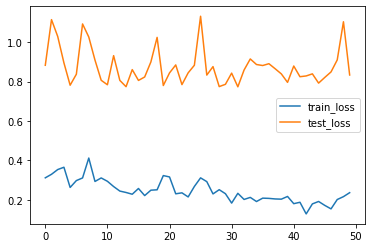

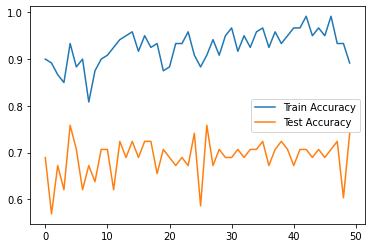

<Figure size 432x288 with 0 Axes>

In [21]:
# plotting the loss
plt.plot(r.history['loss'], label= 'train_loss')
plt.plot(r.history['val_loss'], label= 'test_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label= 'Train Accuracy')
plt.plot(r.history['val_accuracy'], label= 'Test Accuracy')
plt.legend()
plt.show()
plt.savefig('AccValAcc.jpg')

In [31]:
 # Saving the model as h5 file
from tensorflow.keras.models import load_model
model.save('car_brand_model_resnet50.h5')  

In [10]:
y_pred= model.predict(testset)

In [ ]:
y_pred

In [12]:
# for getting the classs
# taking the index of the columns which is having highest value(probability of three classess)
y_pred= np.argmax(y_pred, axis= 1)

In [13]:
y_pred

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1])

In [3]:
# reading an image and doing predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Kaggle/car_brand_model_resnet50.h5')

In [ ]:
model.summary()

In [62]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

   

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Car IS Audi"
    elif preds==1:
        preds="The Car is Lamborghini"
    else:
        preds="The Car Is Mercedes"
    
    
    return preds


In [63]:
image_path= 'Datasets/Test/lamborghini/11.jpg'

In [64]:
model_predict(image_path, model)

'The Car is Lamborghini'